
# Create a small model from scratch and save it

**Modelflow can manage models but it can't estimate equations**. There are many different estimation programs around, each with certain  capabilities. 

In this notebook a small model estimated in Eviews is created in modelflow and solved. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
from  modelmacrograb import GrabMacroModel
from modelclass import model
model.widescreen()

In [4]:
import modeljupytermagic  # to activate %%dataframe

## Load the  national account data 
Using a jupyter magic command (something starting with %%) defined in modeljupytermagic

In [5]:
%%dataframe smalldata start=2011
Y CPV I G X M YDISC
2011 1562682. 1320302. 373938.8 131272.0 121715.0 444232.2 59686.22
2012 1632040. 1360376. 381170.2 128860.1 146292.9 457745.7 73087.14
2013 1689572. 1396402. 414556.8 124254.9 165234.6 522447.7 111572.0
2014 1791141. 1438904. 466473.0 138532.7 194705.5 632207.9 184733.1
2015 1862357. 1476067. 536416.7 154466.9 199214.9 692794.8 188986.9
2016 1870424. 1537410. 570679.5 135990.5 164738.9 714625.6 176230.0
2017 2038337. 1549515. 702407.5 165119.3 179327.0 916469.9 358437.5
2018 2193706. 1645118. 785371.4 168506.8 193124.7 1090956. 492542.0
2019 2339741. 1737872. 874480.5 180872.4 203830.6 1154398. 497084.1
2020 2295808. 1802824. 843961.1 192010.8 171282.5 978064.9 263794.1
2021 2327410. 1846635. 866899.3 211728.7 140302.8 1009072. 270916.5
2022 2402827. 1914157. 941428.0 240255.2 152623.9 1127119. 281482.2
2023 2536741. 2007600. 1060909. 252761.7 179968.7 1260336. 295838.0
2024 2715810. 2151422. 1205927. 278364.4 199108.6 1414850. 295837.8
2025 2924763. 2300322. 1359892. 307746.9 220190.6 1559226. 295837.8
2026 3140827. 2444181. 1512696. 337450.3 242638.9 1691977. 295837.8
2027 3335992. 2552411. 1652032. 363373.5 266225.5 1793888. 295837.8
2028 3528125. 2635657. 1787782. 388431.1 290729.5 1870312. 295837.8
2029 3729062. 2714120. 1927845. 414569.4 316021.6 1939332. 295837.8
2030 3945452. 2802550. 2076752. 441658.4 342117.3 2013464. 295837.8

### Now we got a pandas dataframe with the values

In [6]:
smalldata

,Y,CPV,I,G,X,M,YDISC
index,,,,,,,
2011,1562682.0,1320302.0,373938.8,131272.0,121715.0,444232.2,59686.22
2012,1632040.0,1360376.0,381170.2,128860.1,146292.9,457745.7,73087.14
2013,1689572.0,1396402.0,414556.8,124254.9,165234.6,522447.7,111572.00
2014,1791141.0,1438904.0,466473.0,138532.7,194705.5,632207.9,184733.10
2015,1862357.0,1476067.0,536416.7,154466.9,199214.9,692794.8,188986.90
2016,1870424.0,1537410.0,570679.5,135990.5,164738.9,714625.6,176230.00
2017,2038337.0,1549515.0,702407.5,165119.3,179327.0,916469.9,358437.50
2018,2193706.0,1645118.0,785371.4,168506.8,193124.7,1090956.0,492542.00
2019,2339741.0,1737872.0,874480.5,180872.4,203830.6,1154398.0,497084.10


## Specify  a (small demo) model 

Consumption
Lets make consumption a function of GDP (a proxy for incomes) and just to be fancy we will do it an error correction format.

**Long run equation**

$ CPV_t= \alpha + \beta * Y_t +\eta_t $

In error correction format:

$ \Delta cpv_t = - \gamma *(cpv_{t-1}- y_{t-1} - \beta_2 ) + \Delta y_t $ where lowercase variables preprsent the logarithm of the original variable

For this model we assume that CPV, G, I, M can be specified in the same format.

So we have these **stochastic equations**: 

```
 dlog(cpv)= -gamma_cpv*(log(cpv(-1))-log(y(-1)) - beta_cpv)+beta2_cpv*dlog(y)

 dlog(g)=-gamma_g*(log(g(-1))-log(y(-1)) - beta_g)+beta2_g*dlog(y)

 dlog(i)=-gamma_i*(log(i(-1))-log(y(-1)-g(-1)) - beta_i)+beta2_i*dlog(y) 
 
 dlog(m)=-gamma_m*(log(m(-1))-log(gde(-1)) - beta_m)+beta2_m*dlog(gde)
 
```

 
 In addition we have **two identities**:  
``` 
 y=cpv+i+g+x-m+ydisc
 
 gde=cpv+i+g
```


## The Equations

Now these equations are written in modelflow format and letting the parameters start with c as it makes it more easy to translate estimates from eviews. 

Each equation can be prefixed by options enclosed in \<>.

|Option|meaning|
|:--- |:---|
|fixable|The variable can have its value fixed when simulating |
|damp|When using Gauss-Seidle solution method the equation can be damped|
|ident|This is an identity, used when we have to calculate the values |

The specification is a **string** object and assigned to a variable called: fsmallmodel. 


In [7]:
fsmallmodel = '''
<fixable, damp> dlog(cpv)= -c2_cpv*(log(cpv(-1))-log(y(-1)) -        c1_cpv)+c3_cpv*dlog(y)

<fixable, damp> dlog(g)  = -c2_g*  (log(g(-1))-  log(y(-1)) -        c1_g)  +c3_g*dlog(y)

<fixable, damp> dlog(i)  =    -c2_i*  (log(i(-1))-  log(y(-1)-g(-1)) - c1_i)   +c3_i*dlog(y) 
 
<fixable, damp> dlog(m) =     -c2_m*  (log(m(-1))-   log(gde(-1))    - c1_m)   +c3_m*dlog(gde)
 
<ident> y=cpv+i+g+x-m+ydisc 
 
<ident> gde=cpv+i+g

'''

## Convert the specification to modelflow
The **specification** in itself can not be used for anything useful - it is just a string. The next step is to use the 
specification to create an instance of the  **model class** which can solve the model. Instances of the ```model class``` wraps most of the capabilities of modelflow. Actually we will create a number  
instances of model, as there are additional calculations to be done. So for this particular type of model another class: ***GrabMacroModel** is used to process the model specification. It will handle: 
- Introducing add_factors 
- Normalize equations 
- Make equations fixable 
- Generate equations for fitted values
- Create model to calculate add factors 
- Create model to calculate fitted values
- Create model to calculate identities 

In the next cell it is shown how each equation flows trough several steps. 

|information|meaning|
|:---|:---|
|Frml name|The options provided|
|Endo_var|The left hand side variable|
|Original|The original specification|
|Preprocessed|Some preprocessing like: dlog(x>) --> (log(x)-log(x(-1)))|
|Normalized|Isolation of the endogenous variable on the left hand side|
|Calc_add_factor |An equation for calculating addfactor which makes left and right hand side match|
|Fitted|An equation which calculate the original equation without add factor and fixing |



## On normalization and enrichment of equations 

In [8]:
from modelnormalize import normal 
normal('dlog(a) = dlog(b(-7)) ')

Endo_var        : A
Original        : dlog(a) = dlog(b(-7)) 
Preprocessed    : ((LOG(A))-(LOG(A(-1))))=((LOG(B(-7)))-(LOG(B(-8))))
Normalized      : A = A(-1)*EXP(A_A+ (((LOG(B(-7)))-(LOG(B(-8))))) )
Calc_add_factor : A_A = - ((((LOG(B(-7)))-(LOG(B(-8)))))) +LOG(A)-LOG(A(-1))


Normalized_frml(endo_var='A', original='dlog(a) = dlog(b(-7)) ', preprocessed='((LOG(A))-(LOG(A(-1))))=((LOG(B(-7)))-(LOG(B(-8))))', normalized='A = A(-1)*EXP(A_A+ (((LOG(B(-7)))-(LOG(B(-8))))) )', calc_add_factor='A_A = - ((((LOG(B(-7)))-(LOG(B(-8)))))) +LOG(A)-LOG(A(-1))', un_normalized='', fitted='', eviews='')

In [9]:
normal('a = b',make_fixable=1,make_fitted=1,add_add_factor=1)

Endo_var        : A
Original        : a = b
Preprocessed    : A=B
Normalized      : A = (B + A_A)* (1-A_D)+ A_X*A_D 
Calc_add_factor : A_A = (A) - (B)
Fitted          : A_FITTED = B


Normalized_frml(endo_var='A', original='a = b', preprocessed='A=B', normalized='A = (B + A_A)* (1-A_D)+ A_X*A_D ', calc_add_factor='A_A = (A) - (B)', un_normalized='', fitted='A_FITTED = B', eviews='')

In [10]:
thismodel = GrabMacroModel(fsmallmodel,modelname = 'Small demo model',make_fitted = True, debug = True)


Frml name:<FIXABLE, DAMP>
Endo_var        : CPV
Original        :  DLOG(CPV)= -C2_CPV*(LOG(CPV(-1))-LOG(Y(-1)) -        C1_CPV)+C3_CPV*DLOG(Y)
Preprocessed    : ((LOG(CPV))-(LOG(CPV(-1))))=-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))
Normalized      : CPV = (CPV(-1)*EXP(CPV_A+ (-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))) )) * (1-CPV_D)+ CPV_X*CPV_D 
Calc_add_factor : CPV_A = - ((-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1)))))) +LOG(CPV)-LOG(CPV(-1))
Fitted          : CPV_FITTED = CPV(-1)*EXP( (-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))) )

Frml name:<FIXABLE, DAMP>
Endo_var        : G
Original        :  DLOG(G)  = -C2_G*  (LOG(G(-1))-  LOG(Y(-1)) -        C1_G)  +C3_G*DLOG(Y)
Preprocessed    : ((LOG(G))-(LOG(G(-1))))=-C2_G*(LOG(G(-1))-LOG(Y(-1))-C1_G)+C3_G*((LOG(Y))-(LOG(Y(-1))))
Normalized      : G = (G(-1)*EXP(G_A+ (-C2_G*(LOG(G(-1))-LOG(Y(-1))-C1_G)+C3_G*((LOG(Y))-(LOG(Y(-1

## Get the model
As a convention **m** is used as prefix for model objects.

So the model is called ```msmallmodel```

In [11]:
msmallmodel = thismodel.mmodel

### Inject some variable descriptions. 
A Python dictionary is used for storing variable descriptions. 

In [12]:
descriptions = {
    'CPV'   : 'Private Consumption',
    'Y'     : 'GDP' ,
    'G'     : 'Government' ,
    'I'     : 'Investment',
    'GDE'   : 'Gross Domestic Expenditure',
    'X'     : 'Export',
    'M'     : 'Import',
    'YDISC' :  'Discrepance',
}
msmallmodel.set_var_description(msmallmodel.enrich_var_description(descriptions))

### The model equations
Each equation has the form:
>FRML \<[options]...> \<left hand variable> = \<right hand side expression>$

Equations with the option ```CALC_ADD_FACTOR``` specifies a separate model which can be used to calculate the add factors 
which makes left hand side equals to the right hand side (without any fixing) 

So there are actually specified two models. 

In [13]:
print(msmallmodel.equations)

FRML <FIXABLE, DAMP> CPV = (CPV(-1)*EXP(CPV_A+ (-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))) )) * (1-CPV_D)+ CPV_X*CPV_D $
FRML <FIXABLE, DAMP> G = (G(-1)*EXP(G_A+ (-C2_G*(LOG(G(-1))-LOG(Y(-1))-C1_G)+C3_G*((LOG(Y))-(LOG(Y(-1))))) )) * (1-G_D)+ G_X*G_D $
FRML <FIXABLE, DAMP> I = (I(-1)*EXP(I_A+ (-C2_I*(LOG(I(-1))-LOG(Y(-1)-G(-1))-C1_I)+C3_I*((LOG(Y))-(LOG(Y(-1))))) )) * (1-I_D)+ I_X*I_D $
FRML <FIXABLE, DAMP> M = (M(-1)*EXP(M_A+ (-C2_M*(LOG(M(-1))-LOG(GDE(-1))-C1_M)+C3_M*((LOG(GDE))-(LOG(GDE(-1))))) )) * (1-M_D)+ M_X*M_D $
FRML <IDENT> Y = CPV+I+G+X-M+YDISC$
FRML <IDENT> GDE = CPV+I+G$
FRML <FIT> CPV_FITTED = CPV(-1)*EXP( (-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))) )$
FRML <FIT> G_FITTED = G(-1)*EXP( (-C2_G*(LOG(G(-1))-LOG(Y(-1))-C1_G)+C3_G*((LOG(Y))-(LOG(Y(-1))))) )$
FRML <FIT> I_FITTED = I(-1)*EXP( (-C2_I*(LOG(I(-1))-LOG(Y(-1)-G(-1))-C1_I)+C3_I*((LOG(Y))-(LOG(Y(-1))))) )$
FRML <FIT> M_FITTED = M(-1)*EXP( (-C2_M*(LOG(M(-1))-LOG(

### The model structure can be drawn
Notice that mouseover shows additional information

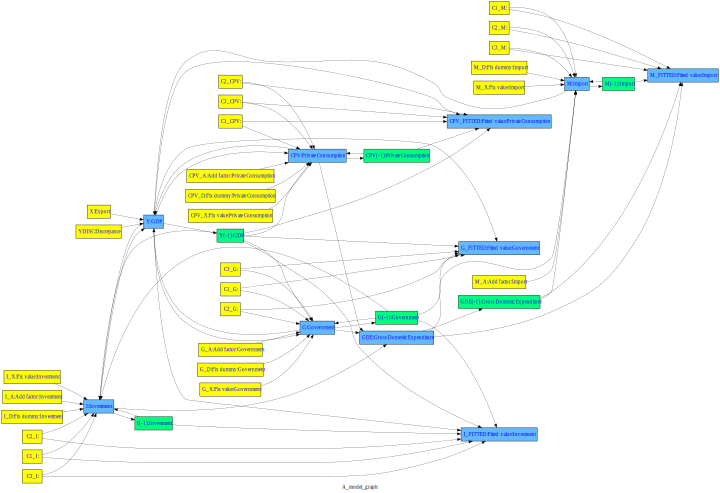

In [14]:
msmallmodel.drawmodel(size = (10,10))

### Only the endogenous variables

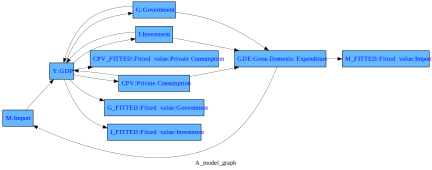

In [15]:
msmallmodel.drawendo()

### The adjacendy matrix for the endogenous variables. 

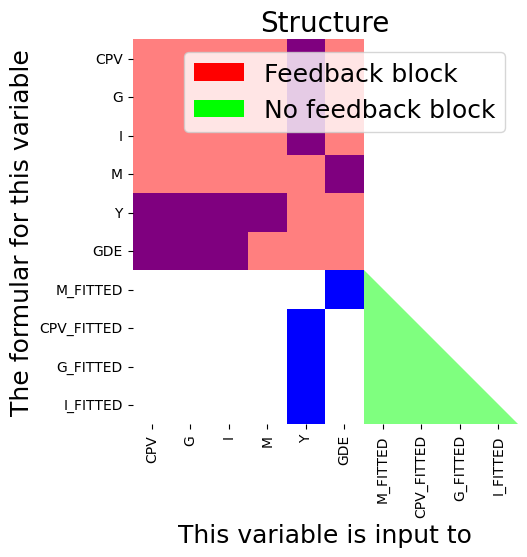

In [16]:
msmallmodel.plotadjacency();

In [17]:
msmallmodel.endogene

{'CPV',
 'CPV_FITTED',
 'G',
 'GDE',
 'G_FITTED',
 'I',
 'I_FITTED',
 'M',
 'M_FITTED',
 'Y'}

In [18]:
msmallmodel.exogene

{'C1_CPV',
 'C1_G',
 'C1_I',
 'C1_M',
 'C2_CPV',
 'C2_G',
 'C2_I',
 'C2_M',
 'C3_CPV',
 'C3_G',
 'C3_I',
 'C3_M',
 'CPV_A',
 'CPV_D',
 'CPV_X',
 'G_A',
 'G_D',
 'G_X',
 'I_A',
 'I_D',
 'I_X',
 'M_A',
 'M_D',
 'M_X',
 'X',
 'YDISC'}

## The Dataframe has to be enriched: 

- The the parameter values
- Variables mentioned in the model, but not present in the dataframe 
- Calculated variables from the model has to be calculated 
- Add factors ensuring that the solution match the data has to be calculated. 

### The parameter values
Modelflow is **not an estimation tool**. So we have to provide the estimated parameters. <br>
This can be done in several way: 
 - The parameters can be input into the equations. This can be automated.
 - The parameters can be broadcast into a dataframe. Which is what we will do here.
 
 For this purpose a "magic" jupyter command will be used. It will create a dataframe with the right values: 
 
**Modelflow don't have a special datatype for parameters** so we just repeat the same value for all years 

In [19]:
%%dataframe parameters   periods=20 start=2011 melt t 

      c2      c1      c3 
cpv   0.38 -0.11 0.02946
g     0.3 -2.5974  1.332   
i     0.027947 -0.515348 1.6967
m     0.37  -1.57 5.0929 

In [20]:
baseline_first  = pd.concat([smalldata,parameters_melted],axis=1) # the original data plus the parameters 
baseline_first  = msmallmodel.insertModelVar(baseline_first) # to make sure all modelvariable are in the dataframe 
baseline_first.head().T # show the result, transposed

index,2011,2012,2013,2014,2015
Y,1.562682e+06,1.632040e+06,1.689572e+06,1.791141e+06,1.862357e+06
CPV,1.320302e+06,1.360376e+06,1.396402e+06,1.438904e+06,1.476067e+06
I,3.739388e+05,3.811702e+05,4.145568e+05,4.664730e+05,5.364167e+05
G,1.312720e+05,1.288601e+05,1.242549e+05,1.385327e+05,1.544669e+05
X,1.217150e+05,1.462929e+05,1.652346e+05,1.947055e+05,1.992149e+05
M,4.442322e+05,4.577457e+05,5.224477e+05,6.322079e+05,6.927948e+05
YDISC,5.968622e+04,7.308714e+04,1.115720e+05,1.847331e+05,1.889869e+05
C2_CPV,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01
C1_CPV,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01
C3_CPV,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02


### Generate the variables defined by identities in the specification.
The two variable Y and GDE are not in the original data, but are defined in identities. This can be 
handled by modelflow. Identities are marked by the option  \<IDENT>.   

A model which can calculate the identities based on the option can be extracted from the model instance by ```.get_histmodel()```.

This small model is run for all years. 

In [21]:
hist_smallmodel = msmallmodel.get_histmodel()

In [22]:
print(hist_smallmodel.equations) # .equations shows the equations in this model 

FRML <IDENT> Y = CPV+I+G+X-M+YDISC$
FRML <IDENT> GDE = CPV+I+G$


In [23]:
baseline = hist_smallmodel(baseline_first,silent=1) # run the model 

In [24]:
baseline[['Y','GDE']].head()  # .head() returns the first 5 rows

,Y,GDE
index,,
2011,1562681.82,1825512.8
2012,1632040.64,1870406.3
2013,1689572.60,1935213.7
2014,1791140.40,2043909.7
2015,1862357.60,2166950.6


### Generate the add factors which will ensure that the model result match the data
If we run the model now the result might be far from the actual values. To take care of this we have to calculate the add factors which makes this happen. The model for doing that is imbedded in the model - remember the equations for this where prepared in an earlier step. 

The model is named ```.calc_add_factor_model()``` and run for the relevant years: 

In addition if a model to create fitted values is present it will also be run. 

In [25]:
fitbaseline = msmallmodel.calc_add_factor_model(baseline,'2016','2030')
fitbaseline = thismodel.mfitmodel(fitbaseline)

Will start calculating: Calculate add factors
2016  solved
2017  solved
2018  solved
2019  solved
2020  solved
2021  solved
2022  solved
2023  solved
2024  solved
2025  solved
2026  solved
2027  solved
2028  solved
2029  solved
2030  solved
Calculate add factors calculated 
Will start calculating: Small demo model calc fittet values
2012  solved
2013  solved
2014  solved
2015  solved
2016  solved
2017  solved
2018  solved
2019  solved
2020  solved
2021  solved
2022  solved
2023  solved
2024  solved
2025  solved
2026  solved
2027  solved
2028  solved
2029  solved
2030  solved
Small demo model calc fittet values calculated 


In [26]:
fitbaseline.loc['2014':'2020',].T

index,2014,2015,2016,2017,2018,2019,2020
Y,1.791140e+06,1.862358e+06,1.870423e+06,2.038336e+06,2.193707e+06,2.339742e+06,2.295808e+06
CPV,1.438904e+06,1.476067e+06,1.537410e+06,1.549515e+06,1.645118e+06,1.737872e+06,1.802824e+06
I,4.664730e+05,5.364167e+05,5.706795e+05,7.024075e+05,7.853714e+05,8.744805e+05,8.439611e+05
G,1.385327e+05,1.544669e+05,1.359905e+05,1.651193e+05,1.685068e+05,1.808724e+05,1.920108e+05
X,1.947055e+05,1.992149e+05,1.647389e+05,1.793270e+05,1.931247e+05,2.038306e+05,1.712825e+05
M,6.322079e+05,6.927948e+05,7.146256e+05,9.164699e+05,1.090956e+06,1.154398e+06,9.780649e+05
YDISC,1.847331e+05,1.889869e+05,1.762300e+05,3.584375e+05,4.925420e+05,4.970841e+05,2.637941e+05
C2_CPV,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01
C1_CPV,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01
C3_CPV,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02


## Now all data is ready and the model can be simulated

In [27]:
result = msmallmodel(fitbaseline,'2020','2030',silent=0,solver='sim',alfa=0.5)
msmallmodel.basedf = fitbaseline # To make comparasion possible. 

Will start solving: Small demo model
Create compiled solving function for Small demo model
ljit=False stringjit=True  transpile_reset=False  hasattr(self, f"pro_{jitname}")=False
now makelos makes a sim solvefunction
2020 Solved in 6 iterations
2021 Solved in 6 iterations
2022 Solved in 6 iterations
2023 Solved in 6 iterations
2024 Solved in 6 iterations
2025 Solved in 6 iterations
2026 Solved in 6 iterations
2027 Solved in 6 iterations
2028 Solved in 6 iterations
2029 Solved in 6 iterations
2030 Solved in 6 iterations
Small demo model solved  


## The solution match the actual values
So it is a starting point for scenario experiments

In [28]:
msmallmodel['#endo'] 

## Dump the model and the data in a file to be used in the next episode 

In [29]:
msmallmodel.modeldump('models/smallmodel.pcim')